In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")


In [8]:
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# Visualize count plot for a categorical feature and target
if 'purpose' in df.columns and 'not.fully.paid' in df.columns:
    sns.countplot(data=df, x='purpose', hue='not.fully.paid')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [14]:
# Convert 'purpose' column to dummy variables
if 'purpose' in df.columns:
    pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
else:
    pre_df = df.copy()  # Use the original dataframe if 'purpose' is not present


In [16]:
# Replace 'not.fully.paid' with the actual column name
target_column = 'not.fully.paid'  # Update this if necessary

if target_column in pre_df.columns:
    X = pre_df.drop(target_column, axis=1)
    y = pre_df[target_column]

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=125
    )
else:
    print(f"The target variable '{target_column}' is not found in the dataset.")


The target variable 'not.fully.paid' is not found in the dataset.


In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


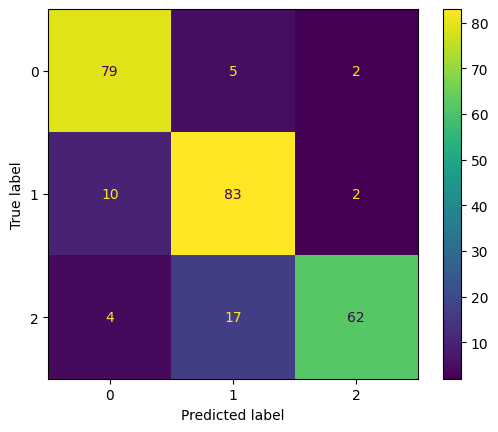

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.79      0.87      0.83        95
           2       0.94      0.75      0.83        83

    accuracy                           0.85       264
   macro avg       0.86      0.85      0.85       264
weighted avg       0.86      0.85      0.85       264



In [18]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
